In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gp
import networkx as nx
import os.path
from os import path
import pathlib

ox.config(log_console=True, use_cache=True)


In [4]:
place_name = "Berlin, Germany"

In [5]:
########### RAILWAY TRAM ###########
if path.exists('./test-geo-railway-tram.graphml'):
    print("CHECK RAILWAY TRAM TRUE")
    graph = ox.io.load_graphml(filepath='test-geo-railway-tram.graphml')
    print("LOAD TRUE")
else:
    print("CHECK RAILWAY TRAM FALSE")
    graph = ox.graph_from_place(place_name,retain_all=True, custom_filter='["railway"~"tram"]')
    ox.save_graphml(graph, filepath='./test-geo-railway-tram.graphml')
    print("SAVE TRUE")

########### BUS ###########        
if path.exists('./test-geo-bus.graphml'):
    print("CHECK BUS TRUE")
    graph1 = ox.io.load_graphml(filepath='test-geo-bus.graphml')
    print("LOAD TRUE")
else:
    print("CHECK BUS FALSE")
    graph1 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["bus"="yes"]')
    ox.save_graphml(graph1, filepath='./test-geo-bus.graphml')
    print("SAVE TRUE")
        
########### RAILWAY TRAMv2 ###########
if path.exists('./test-geo-tram.graphml'):
    print("CHECK RAILWAY TRAMv2 TRUE")
    graph2 = ox.io.load_graphml(filepath='test-geo-tram.graphml')
    print("LOAD TRUE")
else:
    print("CHECK RAILWAY TRAMv2 FALSE")
    graph2 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["tram"="yes"]')
    ox.save_graphml(graph2, filepath='./test-geo-tram.graphml')
    print("SAVE TRUE")
        
########### SUBWAY ###########        
if path.exists('./test-geo-subway.graphml'):
    print("CHECK SUBWAY TRUE")
    graph3 = ox.io.load_graphml(filepath='test-geo-subway.graphml')
    print("LOAD TRUE")
else:
    print("CHECK SUBWAY FALSE")
    #graph3 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["light_rail"="yes"]')
    graph3 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["subway"="yes"]')
    ox.save_graphml(graph3, filepath='./test-geo-subway.graphml')
    print("SAVE TRUE")

########### DRIVE ###########        
if path.exists('./test-geo-drive.graphml'):
    print("CHECK DRIVE TRUE")
    graph4 = ox.io.load_graphml(filepath='test-geo-drive.graphml')
    print("LOAD TRUE")
else:
    print("CHECK DRIVE FALSE")
     #graph3 = ox.graph_from_place(place_name, retain_all=True, custom_filter='["light_rail"="yes"]')
    graph4 = ox.graph_from_place(place_name, retain_all=True, network_type='drive')
    ox.save_graphml(graph4, filepath='./test-geo-drive.graphml')
    print("SAVE TRUE")

########### WALK ###########
if path.exists('./test-geo-walk.graphml'):
    print("CHECK WALK TRUE")
    graph5 = ox.io.load_graphml(filepath='test-geo-walk.graphml')
    print("LOAD TRUE")
else:
    print("CHECK WALK FALSE")
    graph5 = ox.graph_from_place(place_name, retain_all=True, network_type='walk')
    ox.save_graphml(graph5, filepath='./test-geo-walk.graphml')
    print("SAVE TRUE")
        
########### BIG ###########
if path.exists('./test-geo-big.graphml'):
    print("CHECK BIG TRUE")
    graphbig = ox.io.load_graphml(filepath='test-geo-big.graphml')
    print("LOAD TRUE")
else:
    print("CHECK BIG FALSE")
    graphbig = ox.graph_from_place(place_name, retain_all=True)
    ox.save_graphml(graphbig, filepath='./test-geo-big.graphml') 
    print("SAVE TRUE")
   

    
# custom_filter='["bus"="yes"]')
# custom_filter='["psv"="yes"]

CHECK RAILWAY TRAM TRUE
LOAD TRUE
CHECK BUS TRUE
LOAD TRUE
CHECK RAILWAY TRAMv2 TRUE
LOAD TRUE
CHECK SUBWAY TRUE
LOAD TRUE
CHECK DRIVE TRUE
LOAD TRUE
CHECK WALK TRUE
LOAD TRUE
CHECK BIG TRUE
LOAD TRUE


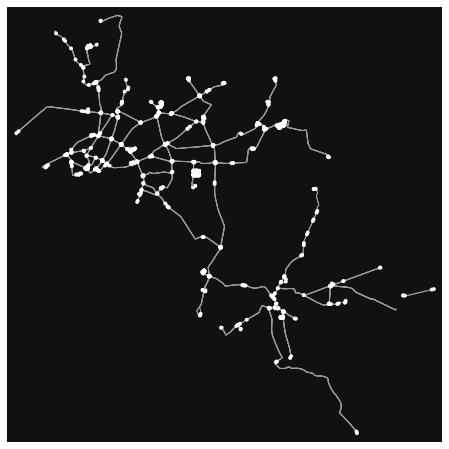

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

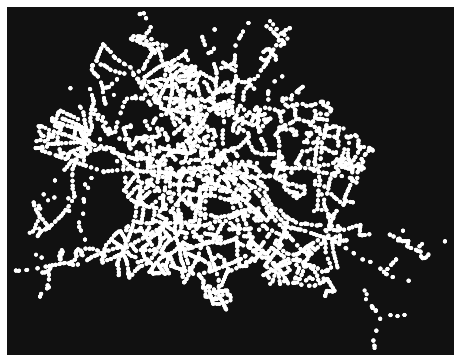

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = ox.plot_graph(graph1)
plt.tight_layout()

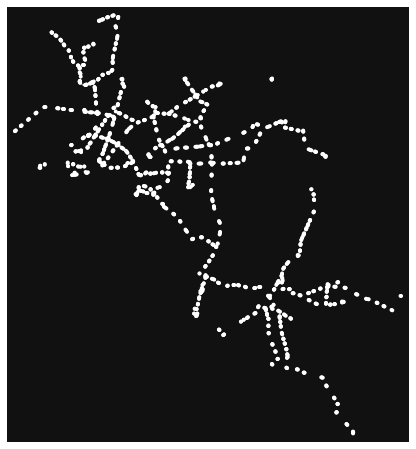

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = ox.plot_graph(graph2)
plt.tight_layout()

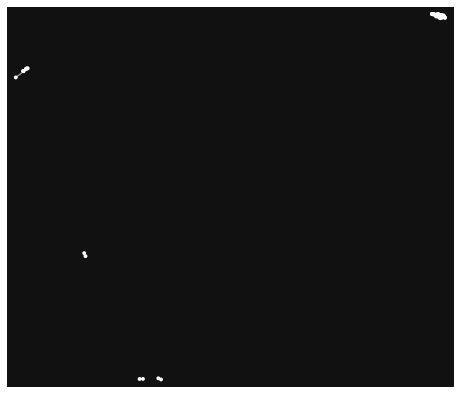

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = ox.plot_graph(graph3)
plt.tight_layout()

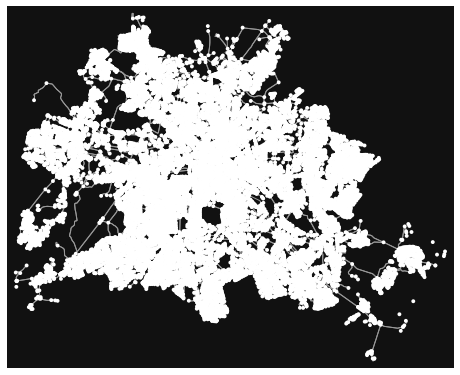

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = ox.plot_graph(graph4)
plt.tight_layout()

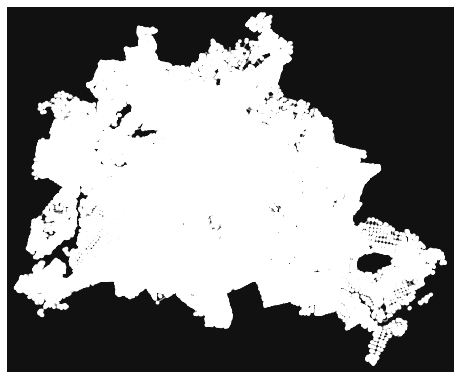

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = ox.plot_graph(graph5)
plt.tight_layout()

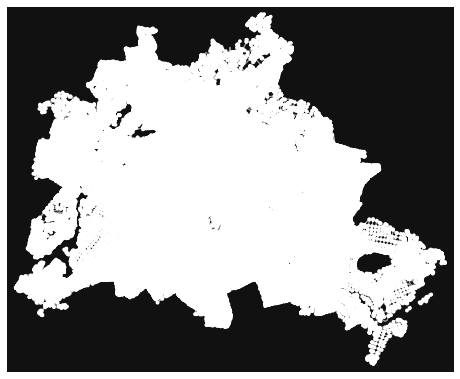

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = ox.plot_graph(graphbig)
plt.tight_layout()

In [13]:
#buildings = ox.geometries.geometries_from_bbox(13.42919, 52.49404,13.42920, 52.49405, tags = {"amenity":True, "landuse":["retail","commercial"], "highway":"bus_stop"})

#railway=rail 	
#railway=light_rail
#railway=subway oder railway=monorail 
#railway=tram

In [51]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points(graph, y, x):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    #travel_speed = 4.5 #walking speed in km/hour
    # add an edge attribute for time in minutes required to traverse each edge
    #meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    #for u, v, k, data in G.edges(data=True, keys=True):
        #data['time'] = data['length'] / meters_per_minute
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [52]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points_withSpeed(graph, y, x, travel_speed):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    
    # add an edge attribute for time in minutes required to traverse each edge
    meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    for u, v, k, data in graph.edges(data=True, keys=True):
        data['time'] = data['length'] / meters_per_minute
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [53]:
#deskriptive ANaylse der des Weges von einem Punkt
def make_spatial_points_FastestSpeed(graph, y, x):
    gdf_nodes = ox.graph_to_gdfs(graph, edges=False)
    
    ##Zentraler Knoten von dem ich starten will
    center_node = ox.get_nearest_node(graph, (y, x))
    
    ##trip Time
    trip_times = [5, 10, 15, 20, 25] #in minutes
    
    
    # add an edge attribute for time in minutes required to traverse each edge
    #meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
    for u, v, k, data in graph.edges(data=True, keys=True):
        try:
            speed = (float(data['maxspeed']) * 1000 / 60)
        except:
            pass
        data['time'] = data['length'] / speed
    ##generierung der Farben die als Hex zurück geben werden 
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
    
    node_colors = {}
    
    #Berechnung und einfärbung je nach Erreichbarkeit ! via Time
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(graph, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            node_colors[node] = color
    #Einfärbung der nicht erreichbarkeit bzw. IF THEN none 
    nc = [node_colors[node] if node in node_colors else 'none' for node in graph.nodes()]
    #Entfernung bzw. ummerierung der nicht erreichbaren punkte bzw. IF THEN none 
    ns = [15 if node in node_colors else 0 for node in graph.nodes()]
    
    gdf_nodes["color"] = nc
    gdf_nodes["spatial"] = ns
    
    return gdf_nodes#[["y","x","color","spatial"]]#, gdf_nodes[["y","x","osmid","ref","geometry"]]

In [54]:
gdf_smart = make_spatial_points(graphbig,52.474240, 13.599249)
gdf_smart1 = make_spatial_points_withSpeed(graphbig,52.474240, 13.599249, 50.0)
gdf_smart2 = make_spatial_points_FastestSpeed(graphbig,52.474240, 13.599249)

In [55]:
gdf_smart

,y,x,osmid,ref,highway,geometry,color,spatial
172539,52.565205,13.335501,172539,NaN,NaN,POINT (13.33550 52.56521),none,0
172545,52.567033,13.346605,172545,NaN,NaN,POINT (13.34661 52.56703),none,0
172546,52.567738,13.352255,172546,NaN,NaN,POINT (13.35225 52.56774),none,0
172547,52.564077,13.339564,172547,NaN,NaN,POINT (13.33956 52.56408),none,0
172549,52.563398,13.342901,172549,NaN,NaN,POINT (13.34290 52.56340),none,0
...,...,...,...,...,...,...,...,...
8090107369,52.526095,13.547996,8090107369,NaN,crossing,POINT (13.54800 52.52610),#cc4778,15
8090107370,52.526160,13.548128,8090107370,NaN,crossing,POINT (13.54813 52.52616),#cc4778,15
8090107371,52.525866,13.546945,8090107371,NaN,NaN,POINT (13.54694 52.52587),#cc4778,15
8090183386,52.430238,13.358667,8090183386,NaN,NaN,POINT (13.35867 52.43024),none,0


In [57]:
type(gdf_smart)

geopandas.geodataframe.GeoDataFrame

In [58]:
gdf_smart.to_file("./analyse_distanz_walk.geojson", driver='GeoJSON')
gdf_smart1.to_file("./analyse_distanz_drive50.geojson", driver='GeoJSON')
gdf_smart2.to_file("./analyse_distanz_driveX.geojson", driver='GeoJSON')

#### gdf_smart

In [42]:
type(graphbig)

networkx.classes.multidigraph.MultiDiGraph

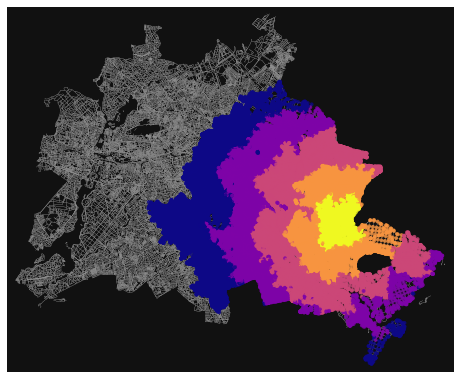

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [43]:
G_projected = ox.project_graph(graphbig)
ox.plot_graph(G_projected, node_color=gdf_smart.color, node_size=gdf_smart.spatial, node_alpha=0.8,
                        edge_linewidth=0.2, edge_color='#999999')

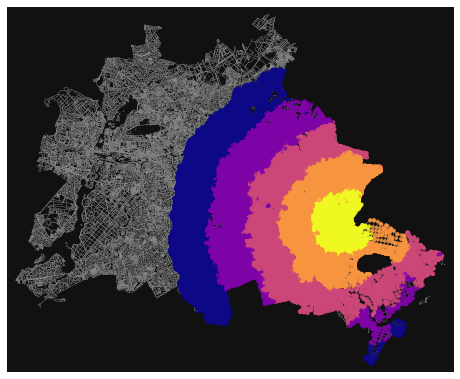

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [44]:
G_projected = ox.project_graph(graphbig)
ox.plot_graph(G_projected, node_color=gdf_smart1.color, node_size=gdf_smart1.spatial, node_alpha=0.8,
                        edge_linewidth=0.2, edge_color='#999999')

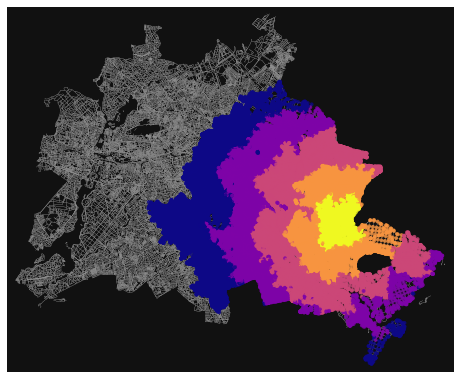

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [45]:
G_projected = ox.project_graph(graphbig)
ox.plot_graph(G_projected, node_color=gdf_smart2.color, node_size=gdf_smart2.spatial, node_alpha=0.8,
                        edge_linewidth=0.2, edge_color='#999999')

In [47]:
graph

In [48]:
gdf_smart.spatial.unique()

array([ 0, 15])

In [49]:
gdf_nodes_big_node, gdf_nodes_big_edges = ox.graph_to_gdfs(graphbig)

In [50]:
gdf_nodes_big_node.head(2)

,y,x,osmid,ref,highway,geometry
172539,52.565205,13.335501,172539,NaN,NaN,POINT (13.33550 52.56521)
172545,52.567033,13.346605,172545,NaN,NaN,POINT (13.34661 52.56703)


In [51]:
gdf_nodes_big_edges.head(2)

,osmid,name,highway,maxspeed,oneway,length,geometry,time,lanes,ref,...,access,service,tunnel,junction,width,est_width,area,u,v,key
0,4610047,Holländerstraße,tertiary,50,False,21.907,"LINESTRING (13.33550 52.56521, 13.33560 52.565...",0.026288,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172539,247765543,0
1,5117633,Gotthardstraße,secondary,50,False,52.407,"LINESTRING (13.33550 52.56521, 13.33565 52.565...",0.062888,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172539,264254836,0


In [52]:
test = gp.GeoDataFrame(gdf_nodes_big_edges.access)

In [53]:
type(test)

geopandas.geodataframe.GeoDataFrame

In [54]:
test.access.value_counts()[:25]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


private                   44169
permissive                13916
customers                  9237
destination                3258
no                         2230
yes                        1098
delivery                    441
agricultural                272
forestry                    182
emergency                   150
[permissive, private]       146
delivery;destination        111
permit                       62
[private, yes]               50
[no, private]                47
[private, destination]       44
[private, customers]         39
[permissive, yes]            36
public                       28
designated                   28
psv                          18
customers;delivery           17
unknown                      16
customer                     14
emergency;permissive         12
Name: access, dtype: int64

In [55]:
gdf_nodes_big_edges.service()

TypeError: 'Series' object is not callable

In [56]:
gdf_nodes_big_edges.describe()

,length,time,u,v,key
count,616783.000000,616783.000000,6.167830e+05,6.167830e+05,616783.000000
mean,54.878064,0.065854,2.861247e+09,2.861259e+09,0.012880
std,68.029629,0.081636,2.549695e+09,2.549748e+09,0.117901
min,0.018000,0.000022,1.725390e+05,1.725390e+05,0.000000
25%,15.765000,0.018918,4.329509e+08,4.333146e+08,0.000000
50%,34.503000,0.041404,2.099813e+09,2.098917e+09,0.000000
75%,68.903000,0.082684,4.985653e+09,4.985653e+09,0.000000
max,4346.975000,5.216370,8.090473e+09,8.090473e+09,5.000000


In [57]:
gdf_nodes_big_edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 616783 entries, 0 to 616782
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osmid      616783 non-null  object  
 1   name       210449 non-null  object  
 2   highway    616783 non-null  object  
 3   maxspeed   175532 non-null  object  
 4   oneway     616783 non-null  bool    
 5   length     616783 non-null  float64 
 6   geometry   616783 non-null  geometry
 7   time       616783 non-null  float64 
 8   lanes      49499 non-null   object  
 9   ref        5269 non-null    object  
 10  bridge     3681 non-null    object  
 11  access     75719 non-null   object  
 12  service    60556 non-null   object  
 13  tunnel     15056 non-null   object  
 14  junction   205 non-null     object  
 15  width      32442 non-null   object  
 16  est_width  383 non-null     object  
 17  area       136 non-null     object  
 18  u          616783 non-null  int64   

In [84]:
gdf_nodes_big_node.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 233500 entries, 172539 to 8090473173
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   y         233500 non-null  float64 
 1   x         233500 non-null  float64 
 2   osmid     233500 non-null  int64   
 3   ref       138 non-null     object  
 4   highway   8492 non-null    object  
 5   geometry  233500 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 12.5+ MB


In [85]:
gdf_nodes_big_node.describe()

,y,x,osmid
count,233500.000000,233500.000000,2.335000e+05
mean,52.503854,13.403517,3.054396e+09
std,0.058172,0.121718,2.584096e+09
min,52.341226,13.091222,1.725390e+05
25%,52.455423,13.316734,5.673530e+08
50%,52.506372,13.405105,2.447203e+09
75%,52.544768,13.494989,5.243517e+09
max,52.673066,13.760062,8.090473e+09
